<a href="https://colab.research.google.com/github/R12942159/NTU_ML/blob/Hw4/Solve%20Laplacian%20Eigenmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting tools

#### (1)

In [2]:
W = np.array([
    [0,1,1,1,0,0,0,0,0,0],
    [1,0,0,1,0,0,0,1,0,0],
    [1,0,0,0,0,0,0,1,0,0],
    [1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,1],
    [0,1,1,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1,0],
])

In [3]:
D = np.diag(np.sum(W,axis=-1))

#### (2)

In [4]:
L = D - W

#### (3)
$
minimize \quad Trace(\Psi^T L \Psi ) \\
let :  \Phi  = D^{1/2}\psi \\
minimize \quad Trace(\Phi^T D^{-1/2}LD^{1/2}\Phi )
$

We can get : $ D^{-1/2}LD^{-1/2} \phi_i = \lambda_i \phi_i$

then, $ \Psi = D^{-1/2}\phi$

In [5]:
D_inverse_sqrt = np.sqrt(np.linalg.inv(D))

In [6]:
Eigenvalues, Eigenvectors = np.linalg.eig(np.dot(np.dot(D_inverse_sqrt, L), D_inverse_sqrt))

In [7]:
Eigenvectors = np.dot(D_inverse_sqrt, Eigenvectors)

In [8]:
np.round(Eigenvalues, 4), np.round(Eigenvectors.T, 4)

(array([0.    , 0.0674, 0.3535, 0.6769, 0.9048, 1.1391, 1.9694, 1.8231,
        1.585 , 1.4807]),
 array([[ 0.2132,  0.2132,  0.2132,  0.2132,  0.2132,  0.2132,  0.2132,
          0.2132,  0.2132,  0.2132],
        [ 0.1883,  0.1746,  0.1576,  0.1946, -0.3628, -0.389 , -0.2877,
          0.1057, -0.0365, -0.1738],
        [ 0.1419,  0.0936, -0.0005,  0.1821,  0.2525,  0.3905, -0.064 ,
         -0.1425, -0.3695, -0.3353],
        [ 0.0907,  0.0997, -0.3065,  0.2947, -0.0935, -0.2895,  0.2291,
         -0.2888, -0.073 ,  0.2416],
        [ 0.1949, -0.2222,  0.4215, -0.1437, -0.0238, -0.25  ,  0.2455,
         -0.1147, -0.232 ,  0.0705],
        [-0.2063,  0.237 , -0.0406, -0.1102,  0.0471, -0.3387,  0.3255,
          0.2176, -0.2872, -0.1377],
        [-0.0508,  0.0628,  0.0911, -0.0062, -0.3755,  0.3873,  0.3407,
         -0.1258,  0.2119, -0.285 ],
        [ 0.2025, -0.1984, -0.2991, -0.0025, -0.2405,  0.2921,  0.1037,
          0.29  , -0.2185,  0.0697],
        [-0.2702,  0.0502,  0.

#### Double check
$ \Psi^T D \Psi = I_{10} $

In [9]:
np.round(np.dot(np.dot(Eigenvectors.T, D), Eigenvectors), 4)

array([[ 1.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.],
       [-0.,  0.,  1.,  0.,  0., -0., -0.,  0.,  0.,  0.],
       [-0.,  0.,  0.,  1.,  0., -0., -0.,  0.,  0., -0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0., -0., -0., -0.],
       [-0., -0., -0., -0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0., -0., -0., -0.,  0.,  0.,  1.,  0., -0.,  0.],
       [-0.,  0.,  0.,  0., -0.,  0.,  0.,  1.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  1., -0.],
       [ 0., -0.,  0., -0., -0.,  0.,  0., -0., -0.,  1.]])

##### Eigenvalues

In [10]:
df = {'Eigenvalues': np.round(Eigenvalues, 4)}
pd.DataFrame(data=df)

,Eigenvalues
0,0.0000
1,0.0674
2,0.3535
3,0.6769
4,0.9048
5,1.1391
6,1.9694
7,1.8231
8,1.5850
9,1.4807


#### Eigenvectors

In [11]:
column_names = [f'Eigenvector{i+1}' for i in range(10)]
df = {column_name: np.round(Eigenvectors.T[i], 4) for i, column_name in enumerate(column_names)}
df = pd.DataFrame(df)
df

,Eigenvector1,Eigenvector2,Eigenvector3,Eigenvector4,Eigenvector5,Eigenvector6,Eigenvector7,Eigenvector8,Eigenvector9,Eigenvector10
0,0.2132,0.1883,0.1419,0.0907,0.1949,-0.2063,-0.0508,0.2025,-0.2702,-0.1641
1,0.2132,0.1746,0.0936,0.0997,-0.2222,0.2370,0.0628,-0.1984,0.0502,-0.2954
2,0.2132,0.1576,-0.0005,-0.3065,0.4215,-0.0406,0.0911,-0.2991,0.2360,0.0541
3,0.2132,0.1946,0.1821,0.2947,-0.1437,-0.1102,-0.0062,-0.0025,0.1880,0.4780
4,0.2132,-0.3628,0.2525,-0.0935,-0.0238,0.0471,-0.3755,-0.2405,-0.2014,0.0909
5,0.2132,-0.3890,0.3905,-0.2895,-0.2500,-0.3387,0.3873,0.2921,0.3443,-0.1891
6,0.2132,-0.2877,-0.0640,0.2291,0.2455,0.3255,0.3407,0.1037,-0.1086,0.1017
7,0.2132,0.1057,-0.1425,-0.2888,-0.1147,0.2176,-0.1258,0.2900,-0.0059,0.1121
8,0.2132,-0.0365,-0.3695,-0.0730,-0.2320,-0.2872,0.2119,-0.2185,-0.2758,0.0797
9,0.2132,-0.1738,-0.3353,0.2416,0.0705,-0.1377,-0.2850,0.0697,0.3285,-0.1887


#### 3-D scatter plot in the reduced points (z1, z2, ..., z10)

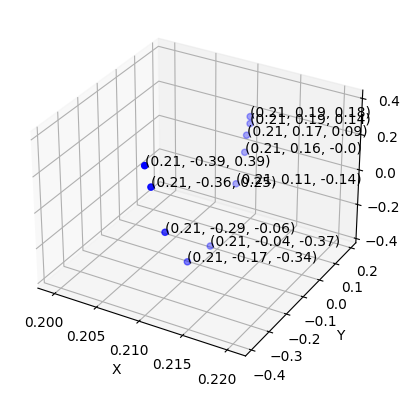

In [12]:
# Define coordinate vector
x = np.round(Eigenvectors[:, 0], 2)
y = np.round(Eigenvectors[:, 1], 2)
z = np.round(Eigenvectors[:, 2], 2)

# Create a 3-D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the points
ax.scatter(x, y, z, c='b', marker='o')

# Including coordinate labels on the data points.
for i in range(len(x)):
    ax.text(x[i], y[i], z[i], f'({x[i]}, {y[i]}, {z[i]})')

# Add labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

#### (4) Choose the second, third, fourth smallest eigenvalue and the corresponding eigenvectors

$Trace(\psi^T L \psi) = 1.0978$

$\psi^T D \psi = I_3$

In [13]:
np.round(np.trace(np.dot(np.dot(Eigenvectors.T[1:4], L), Eigenvectors.T[1:4].T)), 4)

1.0978

In [14]:
np.round(np.dot(np.dot(Eigenvectors.T[1:4], D), Eigenvectors.T[1:4].T), 4)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

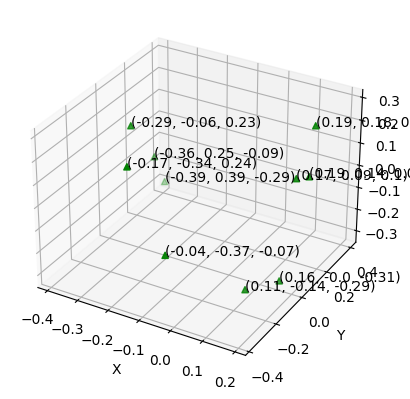

In [15]:
# Define coordinate vector
x = np.round(Eigenvectors[:, 1], 2)
y = np.round(Eigenvectors[:, 2], 2)
z = np.round(Eigenvectors[:, 3], 2)

# Create a 3-D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the points
ax.scatter(x, y, z, c='g', marker='^')

# Including coordinate labels on the data points.
for i in range(len(x)):
    ax.text(x[i], y[i], z[i], f'({x[i]}, {y[i]}, {z[i]})')

# Add labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

(6) By Neighbor Embedding Slide p.9, please show that

In [16]:
f = np.round(Eigenvectors[:, 5], 2)

$f^T L f$

In [17]:
np.dot(np.dot(f.T, L), f)

1.1659

$\frac{1}{2}  {\textstyle \sum_{1 \le i, j\le N}} w_{ij}(f_i - f_j)^2 $

In [18]:
S = 0

for i in range(10):
    for j in range(10):
        S += W[i][j] * ((f[i] - f[j]) ** 2)

In [19]:
S * 0.5

1.1659

(7) Show that if $f$ is an eigenvector of $L$ which corresponds to eigenvalue 0, then $f^T L f = 0$.

In [20]:
np.round(np.dot(np.dot(Eigenvectors[:, 0], L), Eigenvectors[:, 0]), 4)

0.0

#### Hw4

In [21]:
matrix_ones = np.ones((10, 10))

In [22]:
W_adjusted = W + 0.01 * matrix_ones

In [23]:
W_adjusted

array([[0.01, 1.01, 1.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [1.01, 0.01, 0.01, 1.01, 0.01, 0.01, 0.01, 1.01, 0.01, 0.01],
       [1.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 0.01],
       [1.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 1.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 0.01, 0.01, 0.01, 1.01],
       [0.01, 1.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 1.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 1.01, 0.01]])

In [24]:
sum(W_adjusted[0])

3.0999999999999988

In [25]:
T = np.zeros((10, 10))

In [26]:
for i in range(10):
    for j in range(10):
        T[i][j] = round(W_adjusted[i][j] / sum(W_adjusted[i]), 3)

#####(1) Please write down the transition matrix T .

In [27]:
T

array([[0.003, 0.326, 0.326, 0.326, 0.003, 0.003, 0.003, 0.003, 0.003,
        0.003],
       [0.326, 0.003, 0.003, 0.326, 0.003, 0.003, 0.003, 0.326, 0.003,
        0.003],
       [0.481, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.481, 0.005,
        0.005],
       [0.481, 0.481, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
        0.005],
       [0.005, 0.005, 0.005, 0.005, 0.005, 0.481, 0.481, 0.005, 0.005,
        0.005],
       [0.009, 0.009, 0.009, 0.009, 0.918, 0.009, 0.009, 0.009, 0.009,
        0.009],
       [0.005, 0.005, 0.005, 0.005, 0.481, 0.005, 0.005, 0.005, 0.005,
        0.481],
       [0.003, 0.326, 0.326, 0.003, 0.003, 0.003, 0.003, 0.003, 0.326,
        0.003],
       [0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.481, 0.005,
        0.481],
       [0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.481, 0.005, 0.481,
        0.005]])

In [28]:
Y_0 = np.array([
     [1.0, 0.0],
     [0.5, 0.5],
     [0.5, 0.5],
     [0.5, 0.5],
     [0.5, 0.5],
     [0.5, 0.5],
     [0.0, 1.0],
     [0.5, 0.5],
     [0.5, 0.5],
     [0.5, 0.5],
])

In [29]:
def Label_Propagation(Y_0, T, eplsilon= 1e-8):
    t = 0
    loss = 100
    while loss > eplsilon:
        t += 1
        print(t)
        # Random walk to its neighbor
        Y_1 = np.dot(T, Y_0)
        # Normalize the probability distribution
        for i in range(10):
            for j in range(2):
                Y_1[i][j] = Y_1[i][j] / sum(Y_1[i])
        # Clamp the labeled data
        Y_1[0][0] = 1
        Y_1[0][1] = 0
        Y_1[6][0] = 0
        Y_1[6][1] = 1
        # Calculate Frobenius norm
        loss = np.linalg.norm(Y_1 - Y_0, ord='fro')

        Y_0 = Y_1
    x_class = [(i.argmax() + 1) for i in Y_1]
    return x_class

In [ ]:
x_class = Label_Propagation(Y_0, T)

In [31]:
x_class

[1, 1, 1, 1, 2, 2, 2, 1, 1, 2]

#### (8)

In [144]:
W_adjusted

array([[0.01, 1.01, 1.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [1.01, 0.01, 0.01, 1.01, 0.01, 0.01, 0.01, 1.01, 0.01, 0.01],
       [1.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 0.01],
       [1.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 1.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 0.01, 0.01, 0.01, 1.01],
       [0.01, 1.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 1.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 1.01, 0.01]])

In [145]:
W_0 = W_adjusted[0]
W_1 = W_adjusted[6]
W_2 = W_adjusted[1]
W_3 = W_adjusted[2]
W_4 = W_adjusted[3]
W_5 = W_adjusted[4]
W_6 = W_adjusted[5]
W_7 = W_adjusted[7]
W_8 = W_adjusted[8]
W_9 = W_adjusted[9]

In [146]:
W_new = np.vstack([W_0, W_1, W_2, W_3, W_4, W_5, W_6, W_7, W_8, W_9])

In [147]:
W_new

array([[0.01, 1.01, 1.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 0.01, 0.01, 0.01, 1.01],
       [1.01, 0.01, 0.01, 1.01, 0.01, 0.01, 0.01, 1.01, 0.01, 0.01],
       [1.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 0.01],
       [1.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 1.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 1.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 1.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.01, 0.01, 1.01, 0.01]])

In [148]:
W_new.T[0]

array([0.01, 0.01, 1.01, 1.01, 1.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [149]:
T = np.zeros((10, 10))
T_bar = np.zeros((10, 10))

In [150]:
for i in range(10):
    for j in range(10):
        T[i][j] = W_new[i][j] / sum(W_new.T[j])

In [151]:
for i in range(10):
    for j in range(10):
        T_bar[i][j] = T[i][j] / sum(T[i])

In [159]:
T_ul = np.zeros((8, 2))
T_uu = np.zeros((8, 8))

In [160]:
for i in range(8):
    for j in range(10):
        if j < 2:
            T_ul[i][j] = T_bar[i+2][j]
        else:
            T_uu[i][j-2] = T_bar[i+2][j]

In [155]:
I = [
    [1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0],
    [0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1],
]

In [156]:
Y_l = [
    [1, 0],
    [0, 1],
]

In [161]:
np.dot(np.dot(np.linalg.inv(I - T_uu), T_ul), Y_l)

array([[0.71146788, 0.28853212],
       [0.71146788, 0.28853212],
       [0.50266941, 0.49733059],
       [0.50895114, 0.49104886],
       [0.50595901, 0.49404099],
       [0.44823879, 0.55176121],
       [0.47962756, 0.52037244],
       [0.49498363, 0.50501637]])